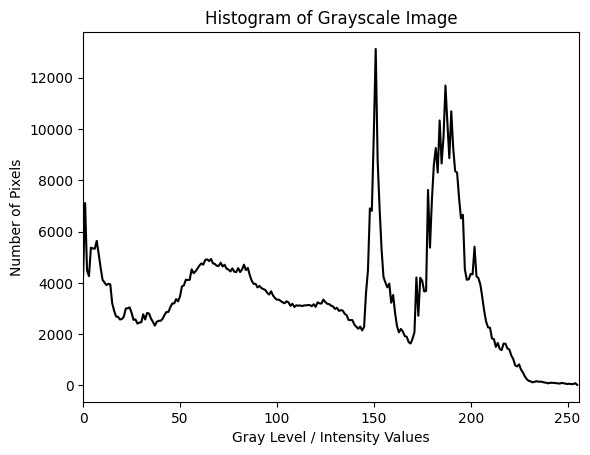

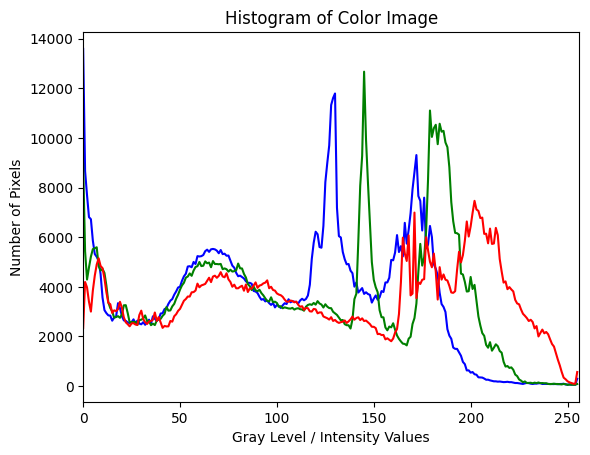

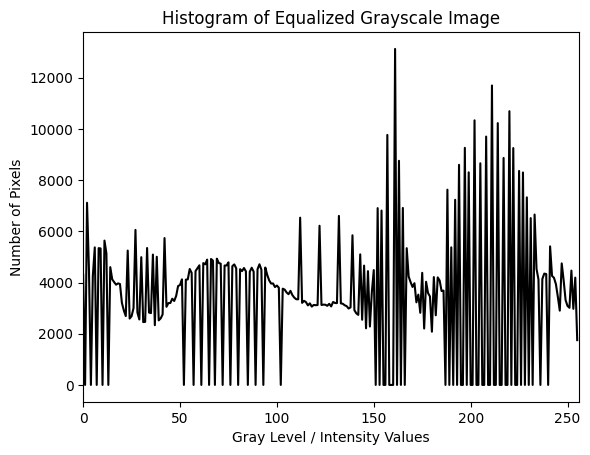

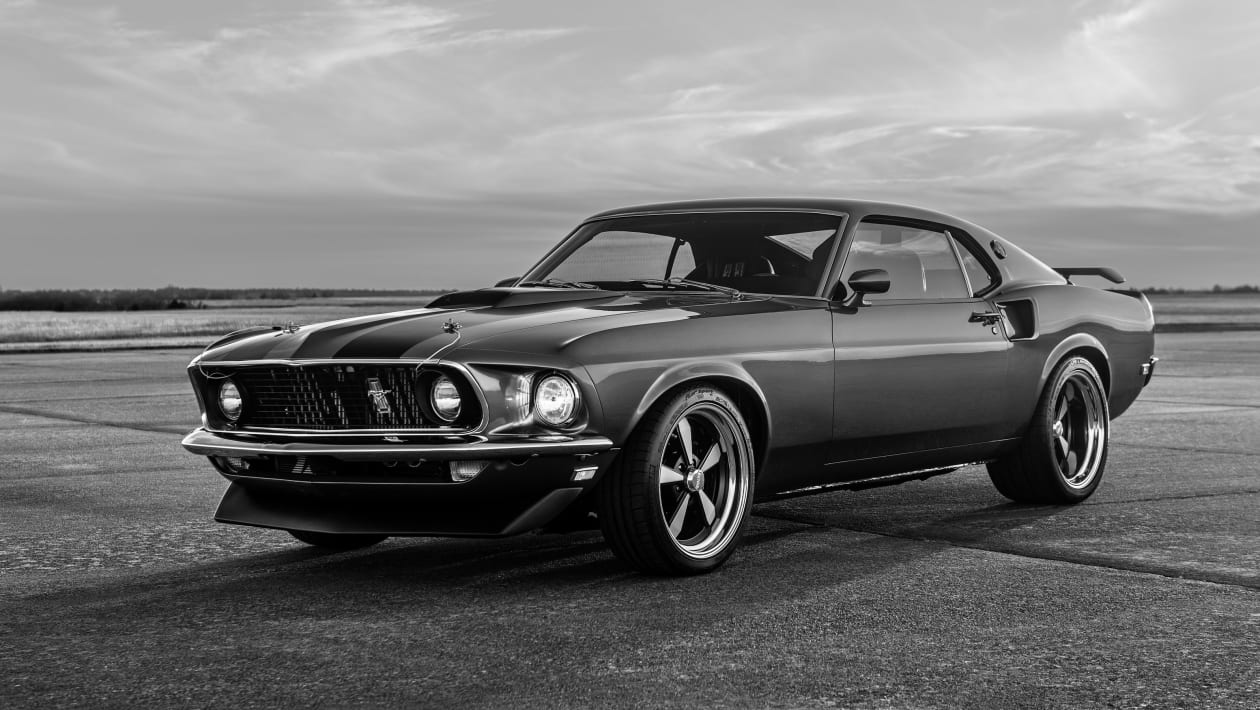

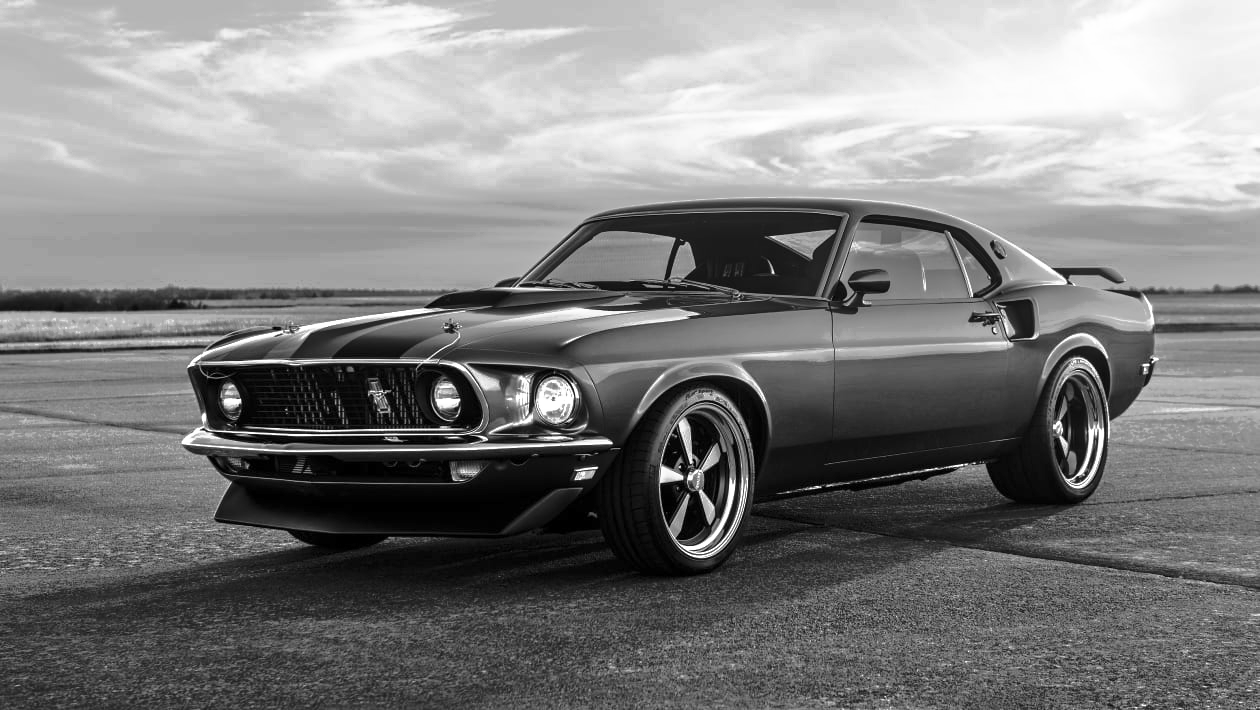

In [ ]:
#Task1

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_histogram(image, title, is_gray=False):
    if is_gray:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.figure()
        plt.title(title)
        plt.xlabel("Gray Level / Intensity Values")
        plt.ylabel("Number of Pixels")
        plt.plot(hist, color='black')
        plt.xlim([0, 256])
        plt.show()
    else:
        colors = ('b', 'g', 'r')
        plt.figure()
        plt.title(title)
        plt.xlabel("Gray Level / Intensity Values")
        plt.ylabel("Number of Pixels")
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
        plt.xlim([0, 256])
        plt.show()

def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

image_color = cv2.imread('/content/Ford Mustang Mach 1-5.jpg')

image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)


compute_histogram(image_gray, "Histogram of Grayscale Image", is_gray=True)


compute_histogram(image_color, "Histogram of Color Image")

equalized_image = histogram_equalization(image_gray)
compute_histogram(equalized_image, "Histogram of Equalized Grayscale Image", is_gray=True)


cv2_imshow(image_gray)
cv2_imshow(equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



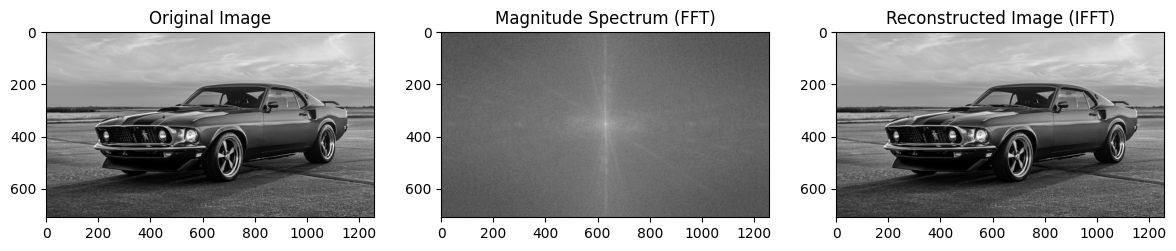

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image_gray = cv2.imread("/content/Ford Mustang Mach 1-5.jpg", cv2.IMREAD_GRAYSCALE)

# Compute FFT and shift zero-frequency component to center
dft = np.fft.fft2(image_gray)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))  # Log scale for better visualization

# Inverse FFT
idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (FFT)")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image (IFFT)")

plt.tight_layout()
plt.show()
